<a href="https://colab.research.google.com/github/maskot1977/PCAUMAP/blob/main/notebook/pcaumap_basic_usage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

次元削減手法として有名なものに主成分分析（PCA, Principal Component Analysis）、そして最近注目を浴びているものにUMAP（Uniform Manifold Approximation and Projection for Dimension Reduction）というものがあります。

今回は、その２つを直列に繋げてデータ構造をチョイ見するためのツール PCAUmap を作りました。

# インストール

PCAUmap を github レポジトリからインストールします。コードは https://github.com/maskot1977/PCAUMAP.git から見られます。

In [1]:
!pip install git+https://github.com/maskot1977/PCAUMAP.git

  Cloning https://github.com/maskot1977/PCAUMAP.git to /tmp/pip-req-build-y2pfqm58
  Running command git clone -q https://github.com/maskot1977/PCAUMAP.git /tmp/pip-req-build-y2pfqm58
  Created wheel for pcaumap: filename=pcaumap-0.1.0-cp37-none-any.whl size=4069 sha256=105a1af1e8b544dd1bcc83563ee0e333d9a1f48b873c6891075cac9ac45b215e
  Stored in directory: /tmp/pip-ephem-wheel-cache-539fnps9/wheels/38/75/23/32a1f509a49530de49787801ee6e723d02375f371a299eaf76
Successfully built pcaumap


UMAP のインストール。「umap」ではなく「umap-learn」とすることに注意してください。

In [2]:
!pip install umap-learn

# 基本操作（分類用データ）

次のコードは、PCAを行って、基本的な

- 主成分プロット
- ローディングプロット
- 累積寄与率表示

の表示を行います。

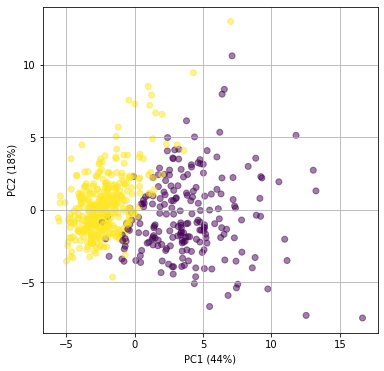

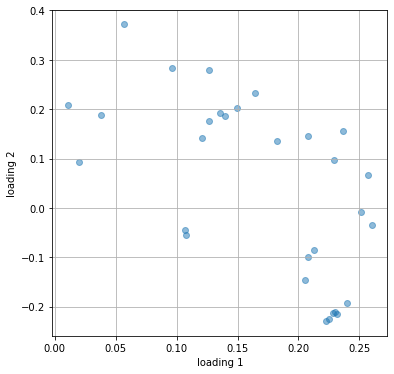

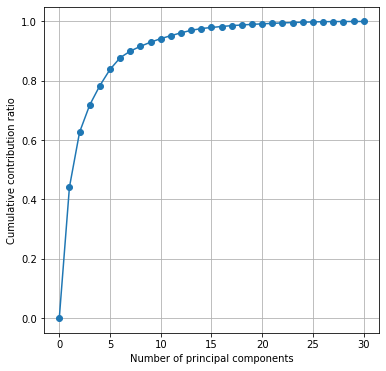

In [3]:
from pcaumap import PCAUmap
import sklearn.datasets

dataset = sklearn.datasets.load_breast_cancer()

pcau = PCAUmap()
pcau.fit(dataset.data)
pcau.pca_summary(c=dataset.target)

続いて、PCAした結果をUMAPしたものを表示するコードはこちらです。

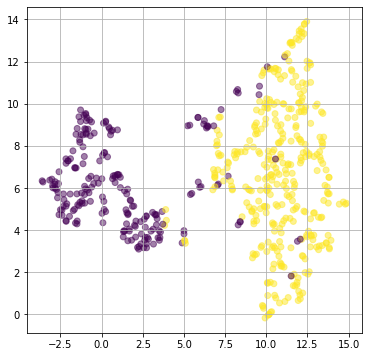

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(pcau.embedding[:, 0], pcau.embedding[:, 1], alpha=0.5, c=dataset.target)
plt.grid()
plt.show()

次のコードのようにして、scikit-learnの分類モデルを適用して、分類結果のランドスケープを眺めることができます。この例ではパラメーターチューニングを全くしていないランダムフォレストを用いていますが、必要に応じて、ゴリゴリにチューニングした任意のモデルを用いることができます。

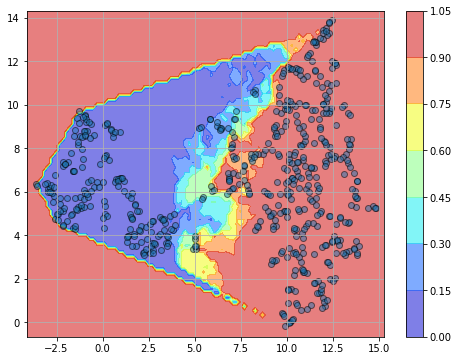

In [5]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(dataset.data, dataset.target)

pcau.map_predicted_values(model)

# 基本操作（回帰用データ）

回帰用のデータと scikit-learn の回帰モデルを適用すれば、下記のように、ほぼ同じコードで回帰結果のランドスケープを眺めることができます。

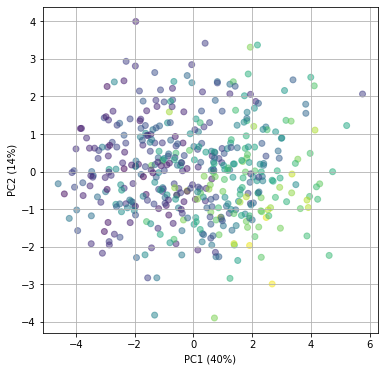

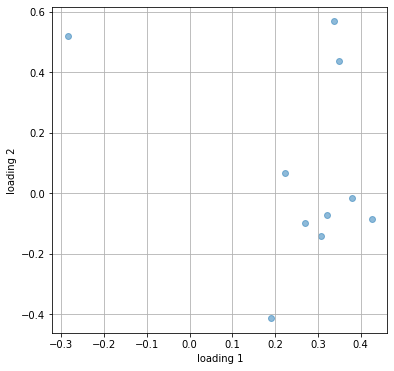

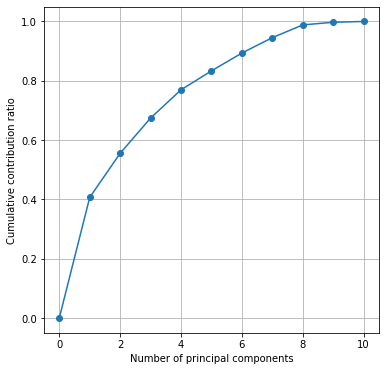

In [6]:
from pcaumap import PCAUmap
import sklearn.datasets

dataset = sklearn.datasets.load_diabetes()

pcau = PCAUmap()
pcau.fit(dataset.data)
pcau.pca_summary(c=dataset.target)

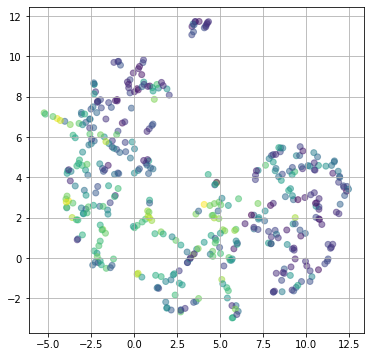

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(pcau.embedding[:, 0], pcau.embedding[:, 1], alpha=0.5, c=dataset.target)
plt.grid()
plt.show()

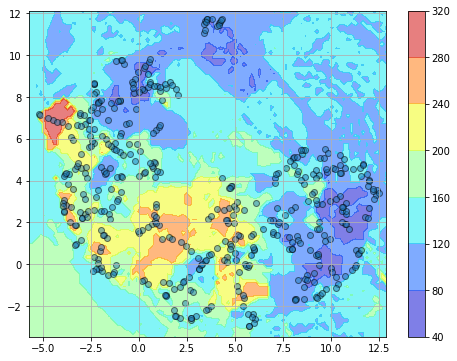

In [8]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(dataset.data, dataset.target)

pcau.map_predicted_values(model)

# 細かい設定

以上、PCAUMAPの簡単な説明をしました。もうちょっと細かい設定を行うこともできるのですが、それはgithubレポジトリ https://github.com/maskot1977/PCAUMAP.git のコードをご参照してください。